## BEANS calculations

In [1]:
from collections import defaultdict
from tqdm import tqdm
import numpy as np
from datasets import concatenate_datasets, load_dataset

datasets = ['watkins','bats','cbi', 'dogs','humbugdb']


for dataset_name in datasets:
    dataset = load_dataset(name='default', path='DBD-research-group/beans_' + dataset_name, cache_dir='workspace/data_birdset')
    merged_data = concatenate_datasets([dataset['train'], dataset['valid'], dataset['test']])

    # Initialize a dictionary to count samples per class
    class_samples = defaultdict(int)
    lengths = []

    # Loop through the merged data to count samples per class
    for sample in tqdm(merged_data, total=len(merged_data), desc="Going through samples"):
        label = sample['label']
        class_samples[label] += 1
        lengths.append(len(sample['path']['array'])/sample['path']['sampling_rate'])

    # Convert the class samples into a list to compute statistics
    sample_counts = list(class_samples.values())

    # Calculate average, min, and max samples per class
    avg_samples = np.mean(sample_counts)
    min_samples = np.min(sample_counts)
    max_samples = np.max(sample_counts)
    var_samples = np.var(sample_counts)  # Variance
    std_samples = np.std(sample_counts)  # Standard deviation
    
    avg_length = np.mean(lengths)
    min_length = np.min(lengths)
    max_length = np.max(lengths)
    var_length = np.var(lengths)  # Variance for lengths
    std_length = np.std(lengths)  # Standard deviation for lengths

    # Print the results
    print(f"Dataset: {dataset_name}")
    print(f"Average samples per class: {avg_samples}")
    print(f"Variance of samples per class: {var_samples}")
    print(f"Standard deviation of samples per class: {std_samples}")
    print(f"Minimum samples per class: {min_samples}")
    print(f"Maximum samples per class: {max_samples}")
    print()
    print(f"Average length of samples: {avg_length}")
    print(f"Variance of sample lengths: {var_length}")
    print(f"Standard deviation of sample lengths: {std_length}")
    print(f"Minimum length of samples: {min_length}")
    print(f"Maximum length of samples: {max_length}")
    
    print("-" * 40)


Going through samples: 100%|██████████| 1695/1695 [00:27<00:00, 62.52it/s] 


Dataset: watkins
Average samples per class: 54.67741935483871
Variance of samples per class: 419.89594172736736
Standard deviation of samples per class: 20.491362612753875
Minimum samples per class: 10
Maximum samples per class: 114

Average length of samples: 10.417029088079374
Variance of sample lengths: 5078.572929487
Standard deviation of sample lengths: 71.26410688058189
Minimum length of samples: 0.0536865234375
Maximum length of samples: 1260.0
----------------------------------------


Resolving data files:   0%|          | 0/22 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/22 [00:00<?, ?it/s]

Loading dataset shards:   0%|          | 0/20 [00:00<?, ?it/s]

Going through samples: 100%|██████████| 10000/10000 [04:33<00:00, 36.55it/s]


Dataset: bats
Average samples per class: 1000.0
Variance of samples per class: 0.0
Standard deviation of samples per class: 0.0
Minimum samples per class: 1000
Maximum samples per class: 1000

Average length of samples: 1.8770317188
Variance of sample lengths: 1.1687457632407736
Standard deviation of sample lengths: 1.081085456030546
Minimum length of samples: 0.047988
Maximum length of samples: 21.859644
----------------------------------------


Resolving data files:   0%|          | 0/24 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/24 [00:00<?, ?it/s]

Loading dataset shards:   0%|          | 0/21 [00:00<?, ?it/s]

Going through samples: 100%|██████████| 21375/21375 [05:04<00:00, 70.09it/s] 


Dataset: cbi
Average samples per class: 80.9659090909091
Variance of samples per class: 661.9344438705234
Standard deviation of samples per class: 25.728086673332772
Minimum samples per class: 9
Maximum samples per class: 100

Average length of samples: 9.405963630770048
Variance of sample lengths: 2.8913194280555716
Standard deviation of sample lengths: 1.700388022792319
Minimum length of samples: 0.052244897959183675
Maximum length of samples: 10.0
----------------------------------------


Going through samples: 100%|██████████| 693/693 [00:32<00:00, 21.58it/s]


Dataset: dogs
Average samples per class: 69.3
Variance of samples per class: 1470.41
Standard deviation of samples per class: 38.34592546803376
Minimum samples per class: 21
Maximum samples per class: 152

Average length of samples: 12.770329272642199
Variance of sample lengths: 255.48980624296658
Standard deviation of sample lengths: 15.98404849351273
Minimum length of samples: 1.0492290249433107
Maximum length of samples: 178.6783446712018
----------------------------------------


Going through samples: 100%|██████████| 9295/9295 [03:03<00:00, 50.53it/s] 

Dataset: humbugdb
Average samples per class: 663.9285714285714
Variance of samples per class: 770577.0663265305
Standard deviation of samples per class: 877.8251912120833
Minimum samples per class: 104
Maximum samples per class: 3287

Average length of samples: 12.959241604000397
Variance of sample lengths: 1023.3513587677039
Standard deviation of sample lengths: 31.98986337525848
Minimum length of samples: 0.004875283446712018
Maximum length of samples: 1794.72
----------------------------------------


## Waveform and spectrogram plot

In [4]:
dataset = load_dataset(name='default', path='DBD-research-group/beans_dogs', cache_dir='workspace/data_birdset')
waveform = dataset['train'][1]['path']['array']
sample_rate = dataset['train'][1]['path']['sampling_rate']

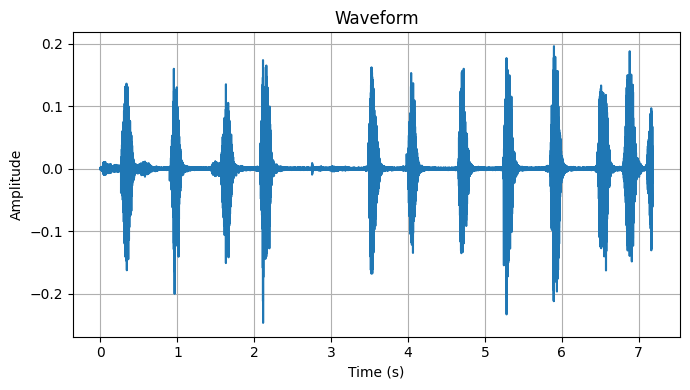

In [13]:
import matplotlib.pyplot as plt
import numpy as np

time = np.linspace(0, len(waveform) / sample_rate, num=len(waveform))

# Plot the waveform
fig = plt.figure(figsize=(7, 4))
plt.plot(time, waveform)
plt.title("Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()
fig.set_size_inches(6, 4)
fig.savefig('waveform.png', dpi=300, bbox_inches='tight')

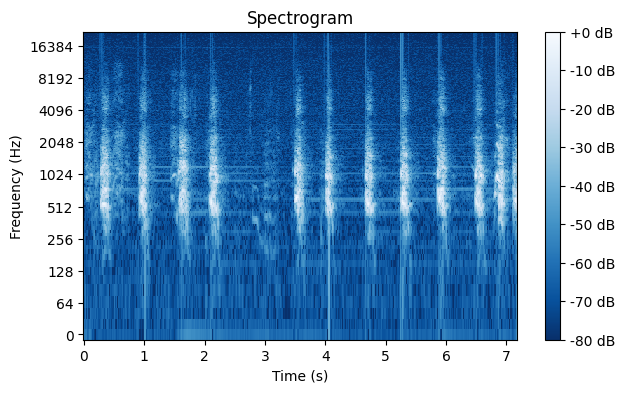

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display

# Assuming waveform_array is your input audio array and sr is the sampling rate
# Example: waveform_array, sr = librosa.load('your_audio_file.wav')

# Compute the Short-Time Fourier Transform (STFT)
D = librosa.amplitude_to_db(np.abs(librosa.stft(waveform)), ref=np.max)

# Create a figure
fig = plt.figure(figsize=(7, 4))

# Plot the spectrogram
librosa.display.specshow(D, sr=sample_rate, x_axis='time', y_axis='log', cmap='Blues_r') #Blues_r

# Add colorbar and labels
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')

# Show the plot
plt.show()
fig.set_size_inches(6, 4)
fig.savefig('spectrogram.png', dpi=300, bbox_inches='tight')